In [1]:
# import the libraries :
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
# importing the dataset
df=pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
### Price ===dependent
## others are independent

In [6]:
df.shape

(5000, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [9]:
data=df.copy()

### Data Preprocessing 

In [10]:
# are there any null values 
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

###### To check Outliers

In [11]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

<Axes: ylabel='Avg. Area Income'>

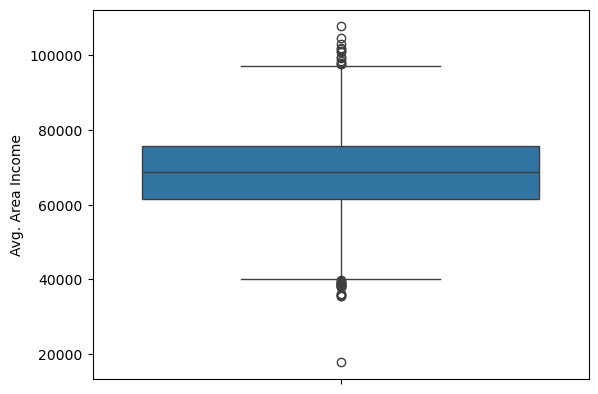

In [12]:
sns.boxplot(data['Avg. Area Income'])

<Axes: ylabel='Avg. Area House Age'>

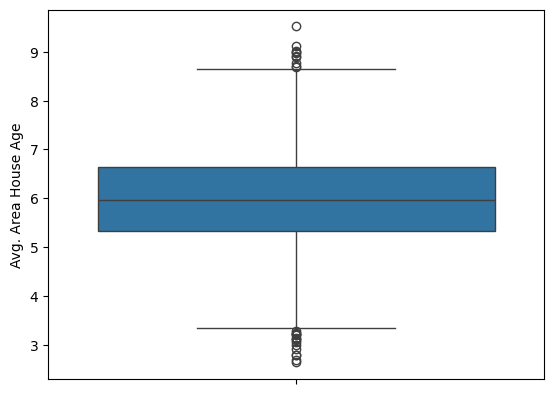

In [13]:
sns.boxplot(data['Avg. Area House Age'])

<Axes: ylabel='Avg. Area Number of Rooms'>

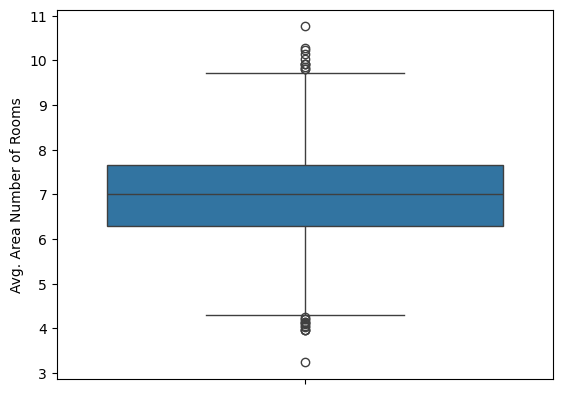

In [14]:
sns.boxplot(data['Avg. Area Number of Rooms'])


<Axes: ylabel='Avg. Area Number of Bedrooms'>

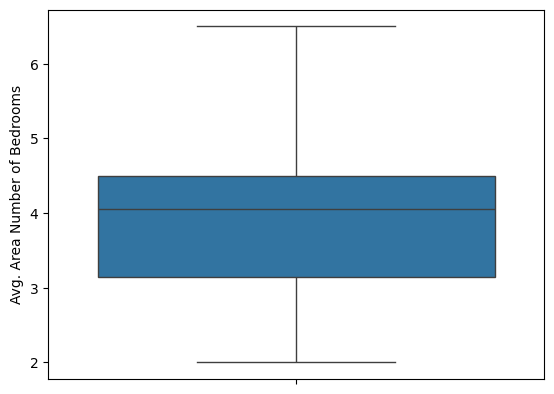

In [15]:
sns.boxplot(data['Avg. Area Number of Bedrooms'])

<Axes: ylabel='Area Population'>

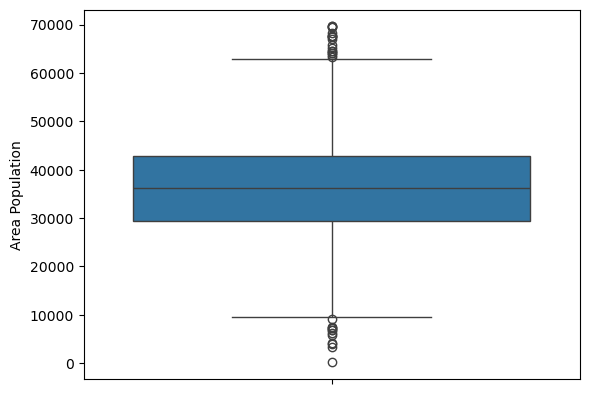

In [16]:
sns.boxplot(data['Area Population'])

In [17]:
# address column is not necessary for predicting the values
data.drop('Address',axis=1,inplace=True)

In [18]:
## How to remove outliers :
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
ub=Q3+1.5*IQR
lb=Q1-1.5*IQR

In [19]:
print(Q1)
print('********************************')
print(Q3)
print('********************************')
print(IQR)
print('********************************')
print(ub)
print('********************************')
print(lb)

Avg. Area Income                 61480.562388
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299250
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928702
Price                           997577.135049
Name: 0.25, dtype: float64
********************************
Avg. Area Income                7.578334e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665871e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64
********************************
Avg. Area Income                 14302.776278
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.366621
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362067
Price                           473633.069163
dtype: float64
********************************
Avg. Area 

In [20]:
arr1=np.array([1,2,0,1])
arr1.all()
# .any : if any value is true it will give true as output
# .all : if all values are true it will give true as output

False

In [21]:
outlier=data[((data<lb)|(data>ub)).any(axis=1)]

In [22]:
outlier

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
12        39033.809237             7.671755                   7.250029   
28        90499.057451             6.384359                   4.242191   
39        17796.631190             4.949557                   6.713905   
90        48904.983269             4.844973                   5.448956   
228       66574.709994             5.550265                   6.844150   
...                ...                  ...                        ...   
4803      61846.135900             5.057578                   7.681141   
4844      37908.675863             6.233813                   7.252916   
4855      35797.323122             5.544221                   7.795138   
4859      73685.403658             8.916093                   6.291818   
4978      80393.339500             8.899713                   5.652974   

      Avg. Area Number of Bedrooms  Area Population         Price  
12                            3.10     39220.361467  1.042814e+06  
28                            3.04     33970.164990  1.240764e+06  
39                            2.50     47162.183643  3.023558e+05  
90                            3.38     32960.753070  2.018981e+05  
228                           2.17     69575.449464  1.702406e+06  
...                            ...              ...           ...  
4803                          3.39     69621.713378  1.504316e+06  
4844                          6.07     39632.079786  8.804028e+05  
4855                          5.00     24844.200190  2.998630e+05  
4859                          3.05     36000.506028  1.798927e+06  
4978                          4.04     39547.932489  1.910585e+06  

[135 rows x 6 columns]

In [23]:
data=data[~((data<lb)|(data>ub)).any(axis=1)]

In [24]:
data.shape

(4865, 6)

In [25]:
135/4865

0.02774922918807811

###  EDA

In [26]:
from ydata_profiling import ProfileReport
profile=ProfileReport(data,title='Trending')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
### More EDA on the columns
### split the data into dep and ind var
### scaling for the data

In [28]:
# Assumptions of Linear Regression
# Linearity
# Homoscadicity
# Normality of residues  ---Q-Q plt
# Autocorelation --- Durbin watson test   1.5 to 2.5
# Multicollinearity --- heatmap /VIF _ Variance Inflation Factor >5
# Endogenity  

In [29]:
# 3/6/2024
## To check Multicollinearity :
data.corr()
## -1 to 1 

Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.021102   
Avg. Area House Age                  -0.021102             1.000000   
Avg. Area Number of Rooms            -0.021113            -0.016919   
Avg. Area Number of Bedrooms          0.012875             0.001177   
Area Population                      -0.014097            -0.024151   
Price                                 0.632031             0.441675   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.021113   
Avg. Area House Age                           -0.016919   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.466596   
Area Population                               -0.000244   
Price                                          0.329630   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area Income                                  0.012875        -0.014097   
Avg. Area House Age                               0.001177        -0.024151   
Avg. Area Number of Rooms                         0.466596        -0.000244   
Avg. Area Number of Bedrooms                      1.000000        -0.023172   
Area Population                                  -0.023172         1.000000   
Price                                             0.168606         0.406027   

                                 Price  
Avg. Area Income              0.632031  
Avg. Area House Age           0.441675  
Avg. Area Number of Rooms     0.329630  
Avg. Area Number of Bedrooms  0.168606  
Area Population               0.406027  
Price                         1.000000

<Axes: >

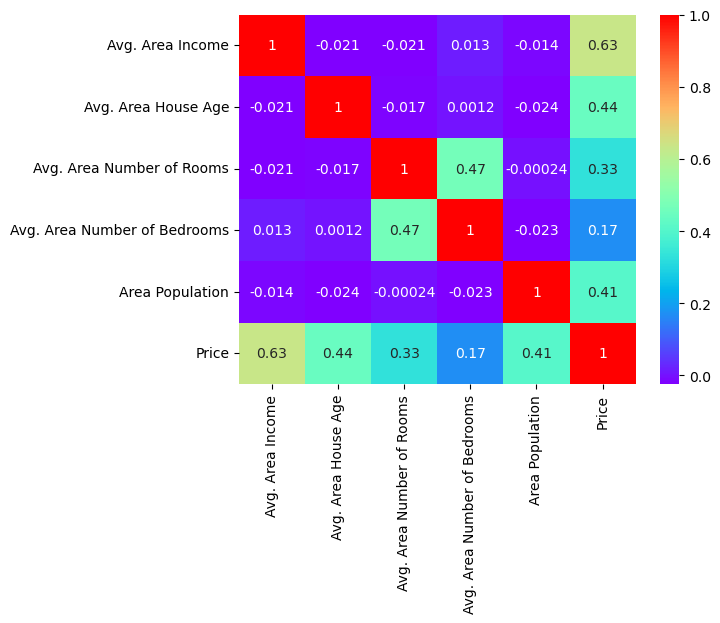

In [30]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='rainbow')

In [31]:
## Here we dont have the Multicollinearity
## the correlation coeff are not same for any two inde columns wrt price.

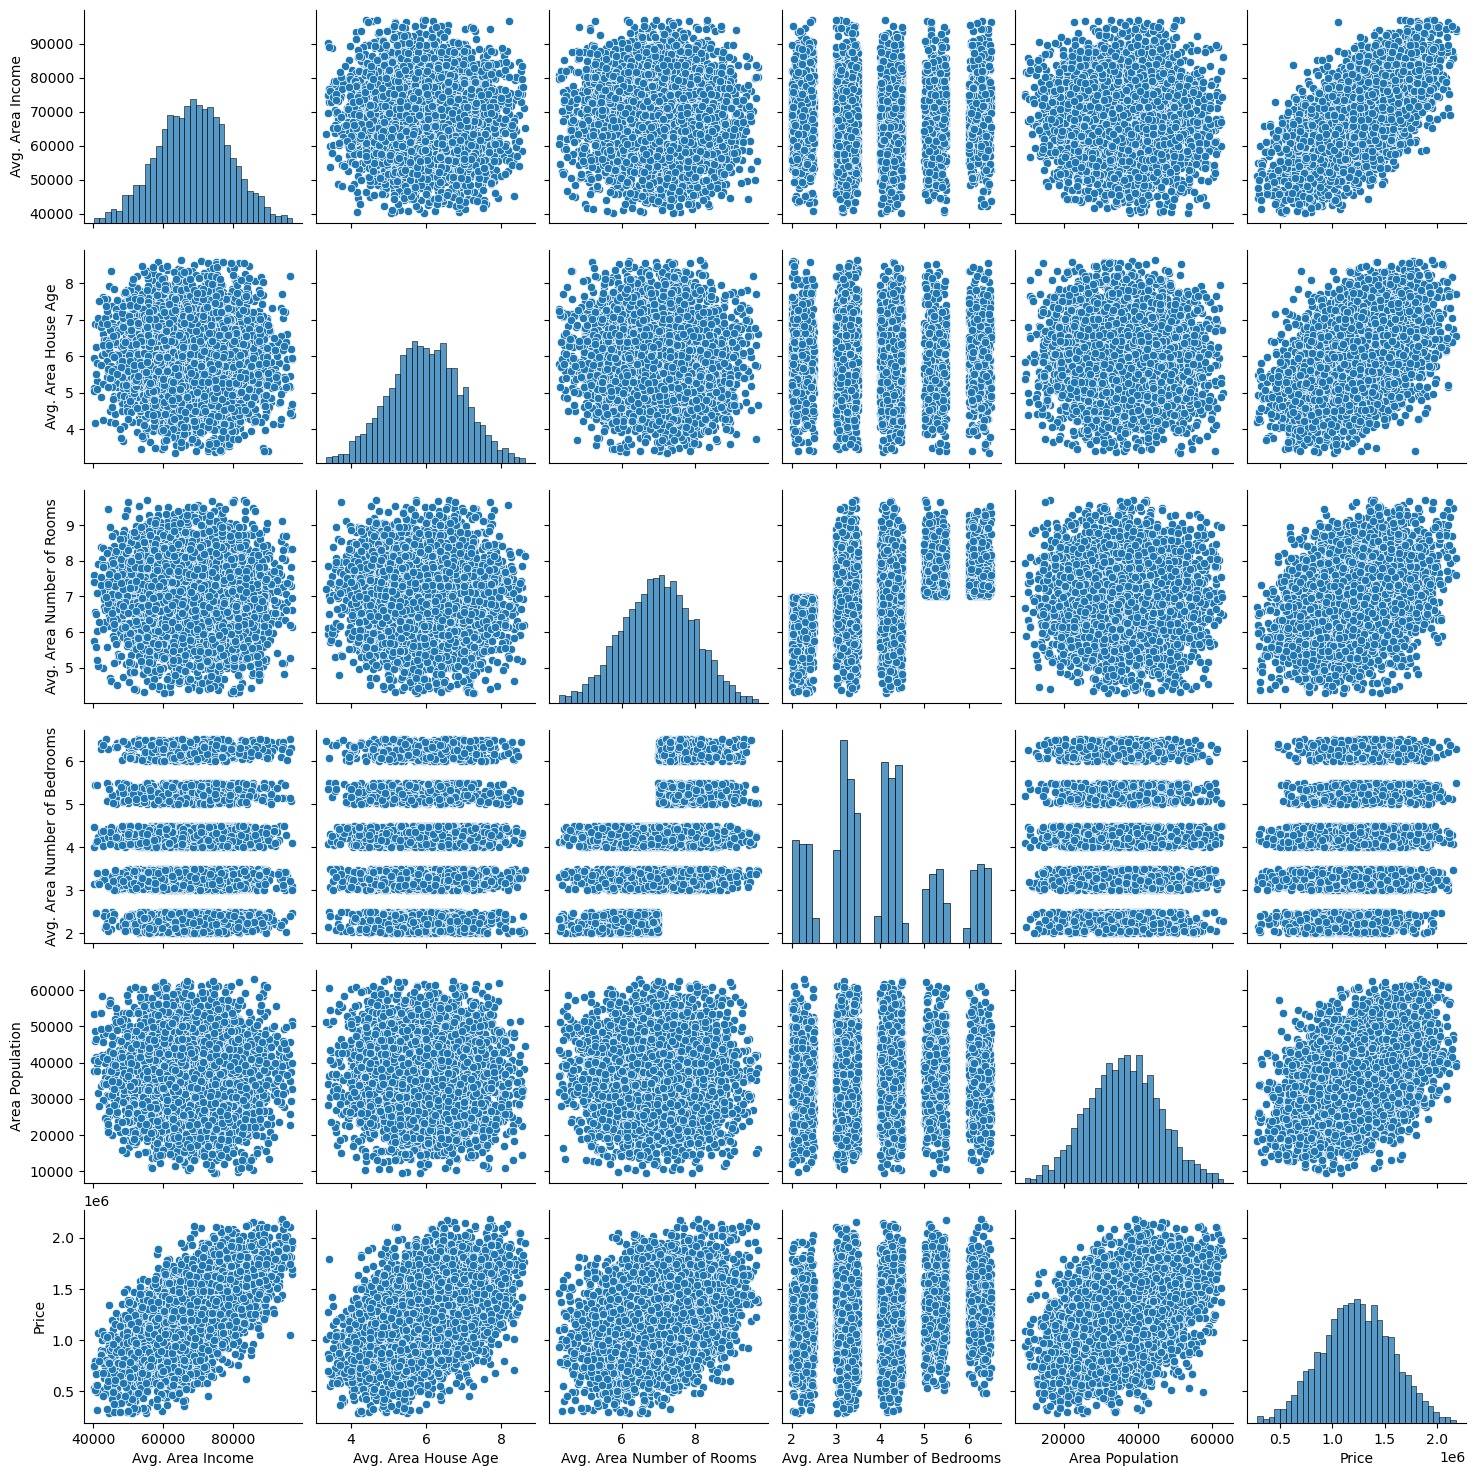

In [32]:
sns.pairplot(data)

In [33]:
## Linearity assumption satisfied

In [34]:
### Dividing the data into dep and ind variables
X=data.drop('Price',axis=1)  # indep variables
y=data['Price']  # dep var

# OR
# X=data.iloc[ :,:-1]  === target var is at last
# y=data.iloc=[:,-1]

In [35]:
X.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09     23086.800503  
1                          3.09     40173.072174  
2                          5.13     36882.159400  
3                          3.26     34310.242831  
4                          4.23     26354.109472

In [36]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [37]:
### Standard Scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaler=ss.fit_transform(X)   # X-ind variables df

In [38]:
x_scaler

array([[ 1.06071779, -0.30363229,  0.02290907,  0.0859644 , -1.35240284],
       [ 1.03191461,  0.02775903, -0.25978767, -0.72371729,  0.4207993 ],
       [-0.7110857 , -0.11411114,  1.5498338 ,  0.92803335,  0.07927052],
       ...,
       [-0.50694938,  1.31970959, -2.2154799 , -1.50101171, -0.29599705],
       [-0.05953013, -0.45737203,  0.14574608,  1.17903467,  0.67532313],
       [-0.30123371,  0.0167887 , -0.1973158 ,  0.06977076,  1.07753698]])

In [39]:
## VIF Factor :
## to check multicollinearity we can use VIF for ind variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
var=x_scaler
vif=pd.DataFrame()
vif['Var_inf_factor']=[variance_inflation_factor(var,i)
                       for i in range(var.shape[1])]
vif['Column name']=X.columns

In [40]:
# var.shape

In [41]:
vif

Var_inf_factor                   Column name
0        1.001776              Avg. Area Income
1        1.001451           Avg. Area House Age
2        1.280194     Avg. Area Number of Rooms
3        1.280126  Avg. Area Number of Bedrooms
4        1.001448               Area Population

In [42]:
# Here all vif values are <5 
# so no multicollinearity

In [43]:
### Preprocessing Completed
## Linearity ,Multicollinearity
## EDA


In [44]:
### NOw To Split into train test

In [45]:
#### Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,\
                                               random_state=101)

In [46]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3892, 5) (973, 5) (3892,) (973,)


## Building a linear regression model

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)  # training on x_train y_train

LinearRegression()

In [48]:
lr.coef_

array([2.14897624e+01, 1.65526169e+05, 1.20061904e+05, 1.89317174e+03,
       1.50413946e+01])

In [49]:
lr.intercept_

-2621808.744818087

In [50]:
y_pred=lr.predict(x_test)   # testing on y_test

In [51]:
y_pred

array([1295727.4838962 , 1511627.83182475, 1089947.45818322,
       1260816.08578809,  732549.14328105, 1156990.82758259,
        630890.16480421, 1443974.81209109, 1512063.84312338,
       1312115.04781852,  685541.13066476,  714702.05542636,
       1492285.00846238, 1543032.3698833 ,  871913.91439129,
       1199362.25231069,  514849.47181318, 1416178.60410179,
       1770594.45393802, 1144185.69820399,  826296.51470199,
        835860.36843626, 1807774.45569494, 1193307.57666999,
       1397886.05858388,  951985.51691449, 2119609.79881057,
       1553958.0994747 , 1051306.99367833,  741920.1277319 ,
       1196766.73784162, 1412494.76334368, 1473099.57681818,
        735787.23473349,  829303.66701347,  909407.64541586,
        954033.38547836,  748220.89713488, 1622101.10888294,
        832360.99728983, 1392932.76584712, 1007344.77436058,
       1485020.98017646, 1235537.19109065,  801240.18360091,
       1291454.25855637,  952539.29845851,  592385.86828986,
        724050.99857787,

In [52]:
pred=pd.DataFrame()
pred['Actual_price']=y_test
pred['Predicted_price']=y_pred

In [53]:
pred

Actual_price  Predicted_price
3409  1.262553e+06     1.295727e+06
583   1.412243e+06     1.511628e+06
3019  1.151342e+06     1.089947e+06
3808  1.341450e+06     1.260816e+06
1543  6.713439e+05     7.325491e+05
...            ...              ...
846   1.412274e+06     1.288472e+06
3554  5.893524e+05     7.597063e+05
3701  7.459963e+05     7.875753e+05
1027  1.726364e+06     1.750372e+06
1865  1.096069e+06     1.126844e+06

[973 rows x 2 columns]

In [54]:
## Now to find accuracy of out model
## R2 score
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
accuracy

0.9115881442182936

In [55]:
#### OLS  : Ordinary Least Square

## Building a OLS model

In [56]:
## we have got good accuracy on non scaled data.

In [57]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as srm

In [58]:
ols_model=srm.OLS(endog=y_train,exog=x_train).fit()

In [59]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          2.269e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):                        0.00
Time:                        14:42:18   Log-Likelihood:                         -53612.
No. Observations:                3892   AIC:                                  1.072e+05
Df Residuals:                    3887   BIC:                                  1.073e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.1543      0.299     33.918      0.000       9.567      10.741
Avg. Area House Age           5.095e+04   3284.492     15.513      0.000    4.45e+04    5.74e+04
Avg. Area Number of Rooms    -9275.9664   3637.101     -2.550      0.011   -1.64e+04   -2145.159
Avg. Area Number of Bedrooms  6557.3310   3408.423      1.924      0.054    -125.136    1.32e+04
Area Population                  7.9245      0.366     21.670      0.000       7.208       8.641
==============================================================================
Omnibus:                        9.925   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.210
Skew:                          -0.028   Prob(JB):                       0.0165
Kurtosis:                       2.782   Cond. No.                     9.47e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
### Using DB test we can say that no Autocorelation (as the value is 1.965)

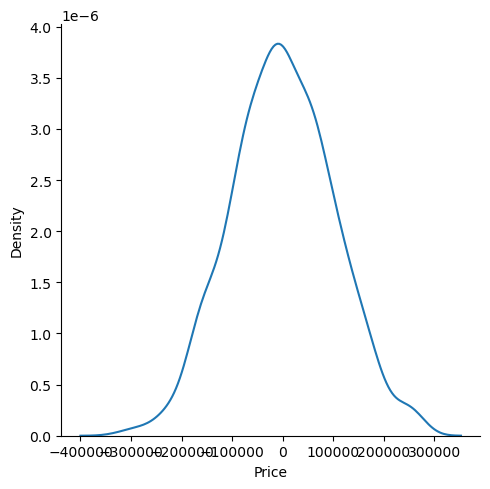

In [61]:
## residue==error ===> actual-pred
sns.displot(y_test-y_pred,kind='kde')
## so from here we can say residues are normally distributed

In [62]:
### Train_accuracy
ypred_train=lr.predict(x_train)
r2_score(y_train,ypred_train)

0.9118537372473339

In [63]:
### Model Underfitting and overfitting 
## underfitting :
## model is not giving good accuracy on training on training data itself.
## underfitting causes due to using less no of features (complexity)
## in uderfitting we will get very high mse for trai ning data this is called
## as high bias problem
## How to recognize ==check the accuracy for training data


## overfitting :
## model is giving good accuracy for training data but it is giving very bad
## accuracy for testing data this situation is called overfitting
## overfitting causes due to using very high no of features.
## as only some datapoints changes the shape of curve is also chaging drastically
## that is why overfitting is also called as high var problem

## in bet overfit and underfit we have optimal no of features.
## but it will be very tedious to find that by trail and error and so
## we use one concept that is called Regularization.

## adding some extrenal error in order to  get rid of overfitting and underfitting

## three types of regularization :
## 1.Lasso  L1: ==The coeff of unwanted variables are reduced to 0   (lambda*|wi|)
##2.Ridge  L2=== the coeff of unwanted feeatures are reduced nearer to 0  (lambda*|wi|^2)
## 3.Elastic net (R+L)



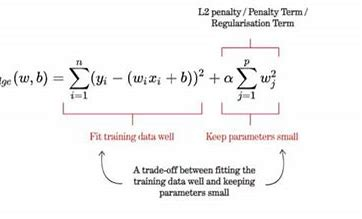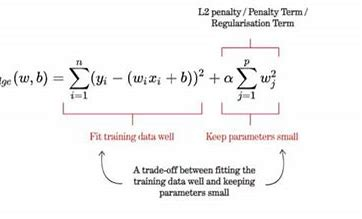

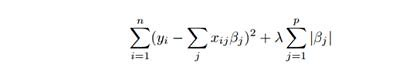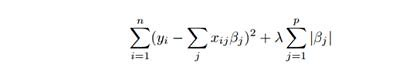

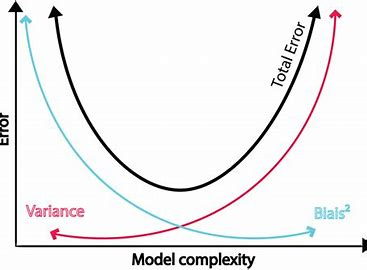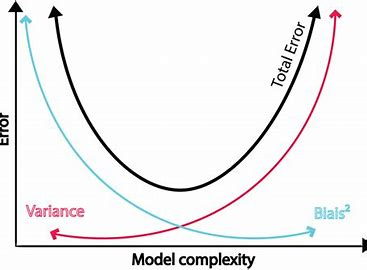

In [64]:
ypred_train=lr.predict(x_train)

In [65]:
r2_score(y_train,ypred_train) # training data accuracy

0.9118537372473339

In [66]:
## Model is not overfit not userfit

## Ridge Normalization

In [67]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [68]:
ri=Ridge(alpha=0.1)
ri.fit(x_train,y_train)


Ridge(alpha=0.1)

In [69]:
y_pred_ri=ri.predict(x_test)

In [70]:
# ridge r2score)
r2_score(y_test,y_pred_ri)

0.9115882208422136

## Lasso Reg

In [71]:
la=Lasso(alpha=0.1)
la.fit(x_train,y_train)

Lasso(alpha=0.1)

In [72]:
y_pred_la=la.predict(x_test)

In [73]:
r2_score(y_test,y_pred_la)

0.911588146305972

In [74]:
## 
lst=[0.1,0.2,0.3,0.4,0.5]
accuracy=[]
for i in lst:
    la=Lasso(alpha=i)
    la.fit(x_train,y_train)
    y_pred_la=la.predict(x_test)
    accuracy.append(r2_score(y_test,y_pred_la))
print(accuracy)


[0.911588146305972, 0.9115881483945905, 0.9115881504782752, 0.9115881525661039, 0.9115881546535373]


In [75]:
# Types of errors :
#1.MSE -Mean Squared Error
#2.RMSE :Root Mean Squared Error
#3.MAE :Mean Absolute Error
#4.MAPE : Mean Absolute percentage error
from sklearn import metrics

In [76]:
print('mse',metrics.mean_squared_error(y_test,y_pred))
print('rmse',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('mae',metrics.mean_absolute_error(y_test,y_pred))
print('mse',metrics.mean_absolute_percentage_error(y_test,y_pred))

mse 10352250110.85078
rmse 101746.00783741237
mae 81286.50795475215
mse 0.07384996205468922


###  Decision Tree Regression

In [86]:
from sklearn.tree import DecisionTreeRegressor
Dtree=DecisionTreeRegressor()
Dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [87]:
y_pred_dtree=Dtree.predict(x_test)

In [91]:
y_pred_train_tree=Dtree.predict(x_train)
# Accuracy of Training
r2_score(y_train,y_pred_train_tree)

1.0

In [89]:
## Accuracy  of Testing
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_dtree)

0.7481434197660469

In [105]:
# max_depth=10
Dtree=DecisionTreeRegressor(max_depth=9)
Dtree.fit(x_train,y_train)
from sklearn.metrics import r2_score
y_pred_dtree=Dtree.predict(x_test)
r2_score(y_test,y_pred_dtree)

0.7751280762707782

### Random Forest


In [114]:
from sklearn.ensemble import RandomForestRegressor
Rforest=RandomForestRegressor(n_estimators=1000)
Rforest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [115]:
y_pred_train_rf=Rforest.predict(x_train)
# Accuracy of Training
r2_score(y_train,y_pred_train_rf)

0.983977127394449

In [116]:
from sklearn.metrics import r2_score
y_pred_rf=Rforest.predict(x_test)
r2_score(y_test,y_pred_rf)

0.8880518634193973

#### Polynomial Regression


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures 

In [78]:
x=6*np.random.rand(200,1)-3
# y=0.8x^2+0.9x+np.random.randn(200,1)
y=0.8*x**2+0.9*x+np.random.randn(200,1)

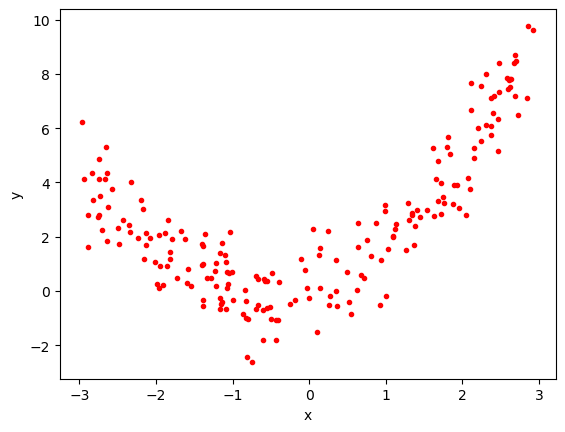

In [79]:
plt.plot(x,y,'.r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [80]:
# train_testsplit
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,\
                                             random_state=101)

In [81]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train1,y_train1)
y_pred_poly=lr.predict(x_test1)
r2_score(y_test1,y_pred_poly)

0.3277675627124361

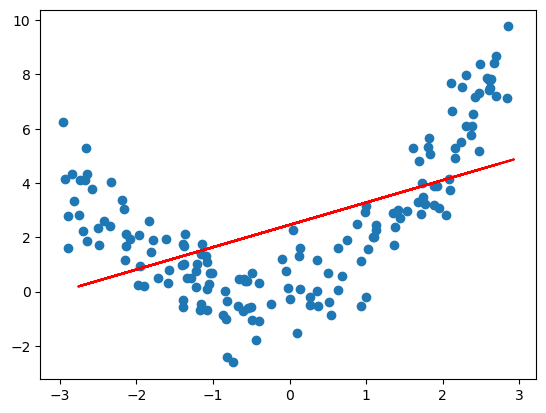

In [82]:
plt.figure()
plt.scatter(x_train1,y_train1)
plt.plot(x_test1,y_pred_poly,'r')
plt.show()

## Using Ploynomial Reg


In [83]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train1)
x_test_poly=poly.fit_transform(x_test1)

In [84]:
linear_ploy=LinearRegression()
lr.fit(x_train_poly,y_train1)
y_pred_poly1=lr.predict(x_test_poly)

In [121]:
r2_score(y_test1,y_pred_poly1)

0.9133205234473196